**TUGAS PRAKTIKUM 6** GANTI DATASET KE FASHION-MNIST ATAU CIFAR-10; BANDINGKAN METRIK.


Muhammad Rizal

G.211.22.0107


#TAHAP 1 – Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import pandas as pd

#TAHAP 2 – Load & Preprocessing Data

In [2]:
def load_dataset(dataset_choice):

    if dataset_choice == "fashion_mnist":
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
        x_train, x_test = x_train / 255.0, x_test / 255.0
        x_train = x_train[..., None]
        x_test  = x_test[..., None]
        input_shape = (28, 28, 1)
        dataset_name = "Fashion-MNIST"

    elif dataset_choice == "cifar10":
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        x_train, x_test = x_train / 255.0, x_test / 255.0
        y_train = y_train.flatten()
        y_test  = y_test.flatten()
        input_shape = (32, 32, 3)
        dataset_name = "CIFAR-10"

    print("Train Shape:", x_train.shape)
    print("Test Shape :", x_test.shape)

    return x_train, y_train, x_test, y_test, input_shape, dataset_name


x_train_fm, y_train_fm, x_test_fm, y_test_fm, shape_fm, name_fm = load_dataset("fashion_mnist")
x_train_cf, y_train_cf, x_test_cf, y_test_cf, shape_cf, name_cf = load_dataset("cifar10")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Shape: (60000, 28, 28, 1)
Test Shape : (10000, 28, 28, 1)
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train Shape: (50000, 32, 32, 3)
Test Shape : (10000, 32, 32, 3)


Visualisasi Dataset (Fashion-MNIST & CIFAR-10)

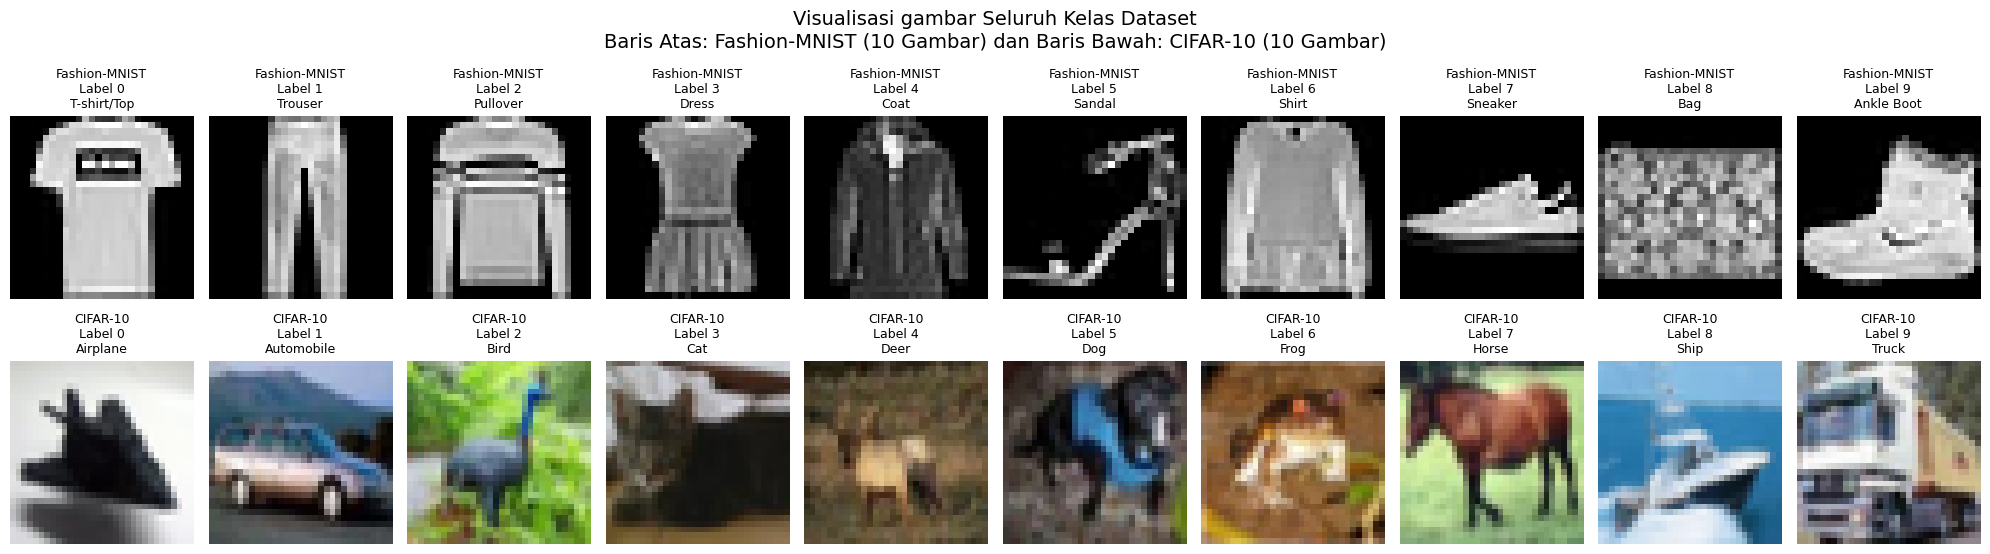

In [14]:
fashion_classes = [
    "T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

cifar_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

def tampilkan_dua_dataset(x_fm, y_fm, x_cf, y_cf):
    plt.figure(figsize=(20,6))

    # Fashion-MNIST (10 Gambar)
    for label in range(10):
        idx = np.where(y_fm == label)[0][0]   # ambil 1 gambar per kelas
        plt.subplot(2, 10, label + 1)
        plt.imshow(x_fm[idx].squeeze(), cmap='gray')
        plt.title(
            f"Fashion-MNIST\nLabel {label}\n{fashion_classes[label]}",
            fontsize=9
        )
        plt.axis('off')

    # CIFAR-10 (10 Gambar)
    for label in range(10):
        idx = np.where(y_cf == label)[0][0]   # ambil 1 gambar per kelas
        plt.subplot(2, 10, label + 11)
        plt.imshow(x_cf[idx])
        plt.title(
            f"CIFAR-10\nLabel {label}\n{cifar_classes[label]}",
            fontsize=9
        )
        plt.axis('off')

    plt.suptitle(
        "Visualisasi gambar Seluruh Kelas Dataset\n"
        "Baris Atas: Fashion-MNIST (10 Gambar) dan Baris Bawah: CIFAR-10 (10 Gambar)",
        fontsize=14
    )

    plt.tight_layout()
    plt.show()


# Pemanggilan untuk menampilkan gambar ke dua Dataset
tampilkan_dua_dataset(x_train_fm, y_train_fm, x_train_cf, y_train_cf)


#TAHAP 3 – Membangun Model CNN

In [3]:
def build_cnn(input_shape, num_classes):

    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


model_fm = build_cnn(shape_fm, 10)
model_cf = build_cnn(shape_cf, 10)

model_fm.summary()
model_cf.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

#TAHAP 4 – Kompilasi Model

In [5]:
model_fm.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_cf.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#TAHAP 5 – Training Model

In [6]:
history_fm = model_fm.fit(
    x_train_fm, y_train_fm,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

history_cf = model_cf.fit(
    x_train_cf, y_train_cf,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 63s 82ms/step - accuracy: 0.7415 - loss: 0.7195 - val_accuracy: 0.8767 - val_loss: 0.3513
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 63s 56ms/step - accuracy: 0.8770 - loss: 0.3347 - val_accuracy: 0.8914 - val_loss: 0.3068
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.8963 - loss: 0.2835 - val_accuracy: 0.8957 - val_loss: 0.2850
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9088 - loss: 0.2516 - val_accuracy: 0.8995 - val_loss: 0.2819
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9134 - loss: 0.2367 - val_accuracy: 0.9050 - val_loss: 0.2641
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 88ms/step - accuracy: 0.3561 - loss: 1.7588 - val_accuracy: 0.5493 - val_loss: 1.2812
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5709 - loss: 1.2254 - val_accuracy: 0.6155 - val_loss: 1.1168
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6285 - loss: 1.0629 - val_accu

#TAHAP 6 – Evaluasi Model

In [7]:
y_pred_fm = np.argmax(model_fm.predict(x_test_fm), axis=1)
y_pred_cf = np.argmax(model_cf.predict(x_test_cf), axis=1)

acc_fm = np.mean(y_pred_fm == y_test_fm)
acc_cf = np.mean(y_pred_cf == y_test_cf)

prec_fm = precision_score(y_test_fm, y_pred_fm, average='weighted')
rec_fm  = recall_score(y_test_fm, y_pred_fm, average='weighted')
f1_fm   = f1_score(y_test_fm, y_pred_fm, average='weighted')

prec_cf = precision_score(y_test_cf, y_pred_cf, average='weighted')
rec_cf  = recall_score(y_test_cf, y_pred_cf, average='weighted')
f1_cf   = f1_score(y_test_cf, y_pred_cf, average='weighted')

print("Fashion-MNIST Classification Report")
print(classification_report(y_test_fm, y_pred_fm))

print("CIFAR-10 Classification Report")
print(classification_report(y_test_cf, y_pred_cf))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Fashion-MNIST Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.83      0.85      1000
           3       0.86      0.94      0.90      1000
           4       0.88      0.80      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.71      0.73      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

CIFAR-10 Classification Report
              precision    recall  f1-score   support

           0       0.71      0.68   

#TAHAP 7 – Visualisasi Akurasi Training

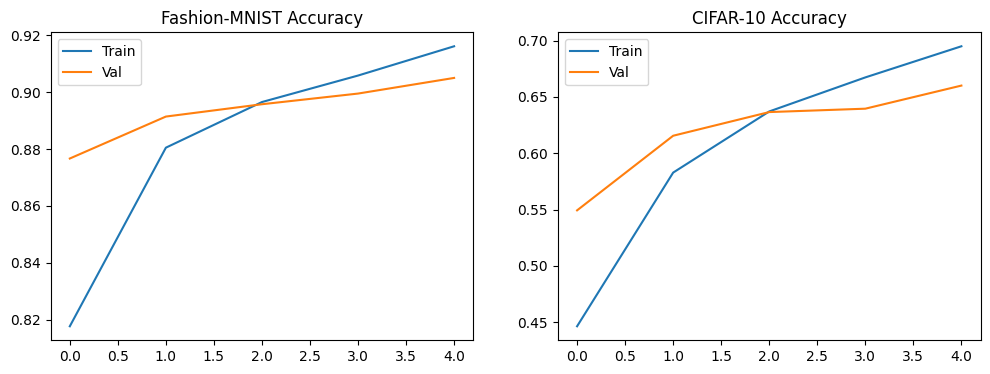

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_fm.history['accuracy'], label='Train')
plt.plot(history_fm.history['val_accuracy'], label='Val')
plt.title('Fashion-MNIST Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cf.history['accuracy'], label='Train')
plt.plot(history_cf.history['val_accuracy'], label='Val')
plt.title('CIFAR-10 Accuracy')
plt.legend()

plt.show()


#TAHAP 8 – Perbandingan Metrik

In [10]:
comparison_df = pd.DataFrame({
    "Dataset": ["Fashion-MNIST", "CIFAR-10"],
    "Accuracy": [acc_fm, acc_cf],
    "Precision": [prec_fm, prec_cf],
    "Recall": [rec_fm, rec_cf],
    "F1 Score": [f1_fm, f1_cf]
})

print("\n=== PERBANDINGAN METRIK CNN ===")
print(comparison_df)



=== PERBANDINGAN METRIK CNN ===
         Dataset  Accuracy  Precision  Recall  F1 Score
0  Fashion-MNIST    0.9021   0.903981  0.9021  0.902380
1       CIFAR-10    0.6587   0.674524  0.6587  0.662545
